### 1. Load & Merging Datasets

In [367]:
import pandas as pd

# Load the CSV files
students_df = pd.read_csv("students.csv")
activity_df = pd.read_csv("course_activity.csv")
feedback_df = pd.read_csv("feedback.csv")

In [368]:
students_df.head(5)

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,24-11-2023
1,S002,Student_2,32,Other,Chennai,27-02-2023
2,S003,Student_3,28,Other,Mumbai,13-01-2023
3,S004,Student_4,25,Female,Bangalore,21-05-2023
4,S005,Student_5,24,Other,Delhi,06-05-2023


In [369]:
activity_df.head(5)

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,05-01-2024,90,46.10
1,S001,DM101,28-01-2024,155,88.87
2,S001,UX303,28-01-2024,177,54.93
3,S002,PY202,03-02-2024,45,32.20
4,S002,UX303,15-03-2024,119,90.80


In [370]:
feedback_df.head(5)

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


In [371]:
# Merge students with course activity

merged_df = pd.merge(activity_df, students_df, on='Student_ID', how='left')

# Merge with feedback data
final_df = pd.merge(merged_df, feedback_df, on=['Student_ID', 'Course_ID'], how='left')

final_df.to_csv('Students_Cleaned_Data.csv', index=False)


In [372]:
final_df.head()

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage,Name,Age,Gender,Location,Enrolment_Date,Rating,Feedback_Text
0,S001,PY202,05-01-2024,90,46.10,Student_1,24,Female,Kolkata,24-11-2023,NaN,NaN
1,S001,DM101,28-01-2024,155,88.87,Student_1,24,Female,Kolkata,24-11-2023,NaN,NaN
2,S001,UX303,28-01-2024,177,54.93,Student_1,24,Female,Kolkata,24-11-2023,NaN,NaN
3,S002,PY202,03-02-2024,45,32.20,Student_2,32,Other,Chennai,27-02-2023,3.0,Well structured
4,S002,UX303,15-03-2024,119,90.80,Student_2,32,Other,Chennai,27-02-2023,NaN,NaN


In [373]:
final_df.describe()

,Time_Spent_Minutes,Completion_Percentage,Age,Rating
count,659.000000,659.000000,659.000000,122.000000
mean,98.113809,54.778710,25.593323,3.008197
std,49.045548,26.289156,4.870825,1.513006
min,10.000000,10.150000,18.000000,1.000000
25%,58.000000,32.070000,21.000000,1.000000
50%,98.000000,53.450000,25.000000,3.000000
75%,139.000000,77.560000,29.000000,4.000000
max,180.000000,100.000000,34.000000,5.000000


In [374]:
final_df.fillna(0) 

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage,Name,Age,Gender,Location,Enrolment_Date,Rating,Feedback_Text
0,S001,PY202,05-01-2024,90,46.10,Student_1,24,Female,Kolkata,24-11-2023,0.0,0
1,S001,DM101,28-01-2024,155,88.87,Student_1,24,Female,Kolkata,24-11-2023,0.0,0
2,S001,UX303,28-01-2024,177,54.93,Student_1,24,Female,Kolkata,24-11-2023,0.0,0
3,S002,PY202,03-02-2024,45,32.20,Student_2,32,Other,Chennai,27-02-2023,3.0,Well structured
4,S002,UX303,15-03-2024,119,90.80,Student_2,32,Other,Chennai,27-02-2023,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
654,S100,PY202,03-03-2024,83,22.63,Student_100,22,Other,Bangalore,16-06-2023,0.0,0
655,S100,UX303,27-02-2024,168,14.83,Student_100,22,Other,Bangalore,16-06-2023,0.0,0
656,S100,UX303,02-01-2024,134,22.29,Student_100,22,Other,Bangalore,16-06-2023,0.0,0
657,S100,WD404,12-03-2024,139,68.78,Student_100,22,Other,Bangalore,16-06-2023,0.0,0


### 2. Exploratory Data Analysis (EDA)

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [377]:
# Recreate Age Groups
bins = [0, 24, 34, 44, 54, 100]
labels = ['18–24', '25–34', '35–44', '45–54', '55+']
final_df['Age_Group'] = pd.cut(final_df['Age'], bins=bins, labels=labels, right=False)

*A. What is the overall average completion rate across courses?*

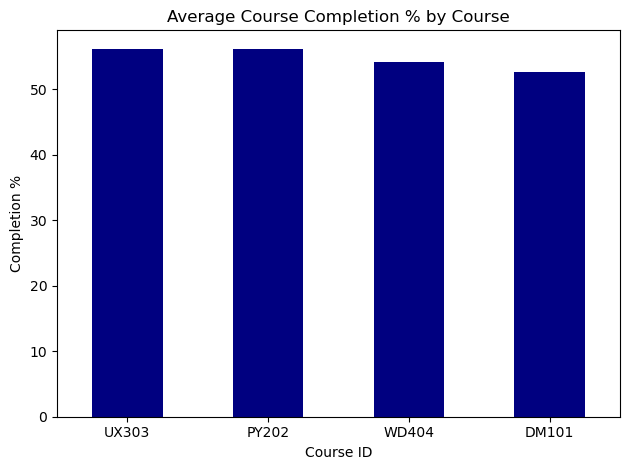

Course_ID
UX303    56.2
PY202    56.1
WD404    54.1
DM101    52.6
Name: Completion_Percentage, dtype: float64

In [379]:
completion_by_course = final_df.groupby('Course_ID')['Completion_Percentage'].mean().sort_values(ascending=False)

# Plot
completion_by_course.plot(kind='bar', color='navy')
plt.title('Average Course Completion % by Course')
plt.ylabel('Completion %')
plt.xlabel('Course ID')
plt.xticks(rotation=0)
plt.tight_layout() 
plt.show()
round (completion_by_course,1)

*B. Which course has the highest and lowest average engagement time?*

In [381]:
# Group by course and calculate average time spent
avg_time_by_course = final_df.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values(ascending=False)

# Display highest and lowest engagement
print("Average Time Spent per Course (in minutes):\n")
print(round(avg_time_by_course, 2))

highest = avg_time_by_course.idxmax()
lowest = avg_time_by_course.idxmin()

print(f"\nHighest Average Engagement Time: {highest} ({avg_time_by_course[highest]:.2f} mins)")
print(f"Lowest Average Engagement Time: {lowest} ({avg_time_by_course[lowest]:.2f} mins)")


Average Time Spent per Course (in minutes):

Course_ID
DM101    102.43
UX303     99.82
WD404     96.42
PY202     93.90
Name: Time_Spent_Minutes, dtype: float64

Highest Average Engagement Time: DM101 (102.43 mins)
Lowest Average Engagement Time: PY202 (93.90 mins)


*C. How does engagement differ by age group or location?*

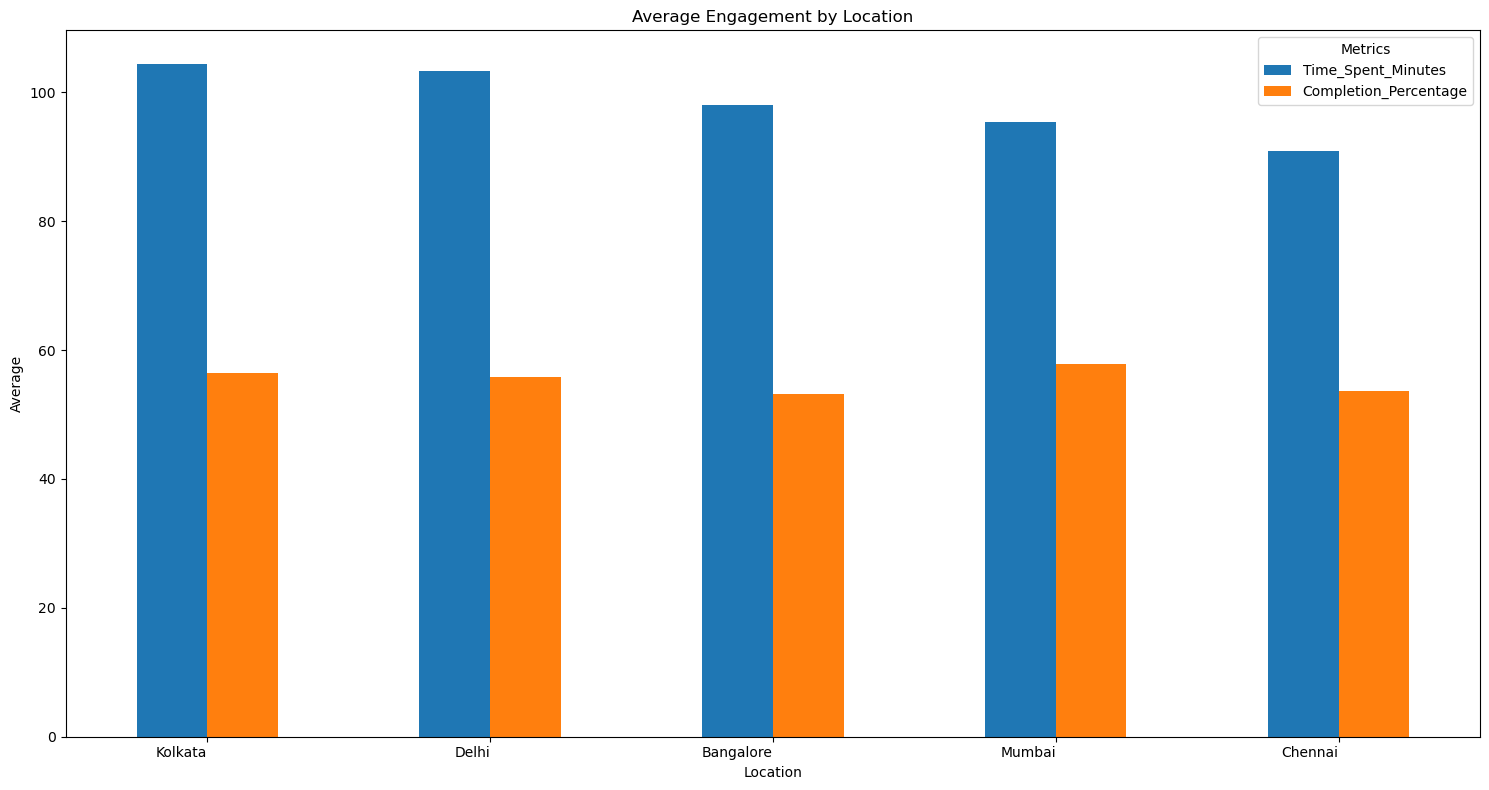

,Time_Spent_Minutes,Completion_Percentage
Location,,
Kolkata,104.0,56.0
Delhi,103.0,56.0
Bangalore,98.0,53.0
Mumbai,95.0,58.0
Chennai,91.0,54.0


In [383]:
#Engagement Trends by Location

engagement_by_location = final_df.groupby('Location', observed=True)[['Time_Spent_Minutes', 'Completion_Percentage']].mean().sort_values(by='Time_Spent_Minutes', ascending=False)

# Plot directly with figsize
ax = engagement_by_location.plot(kind='bar', figsize=(15, 8)) 

plt.title('Average Engagement by Location')
plt.ylabel('Average')
plt.xticks(rotation=0, ha='right') 
plt.legend(title='Metrics')
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

round(engagement_by_location)

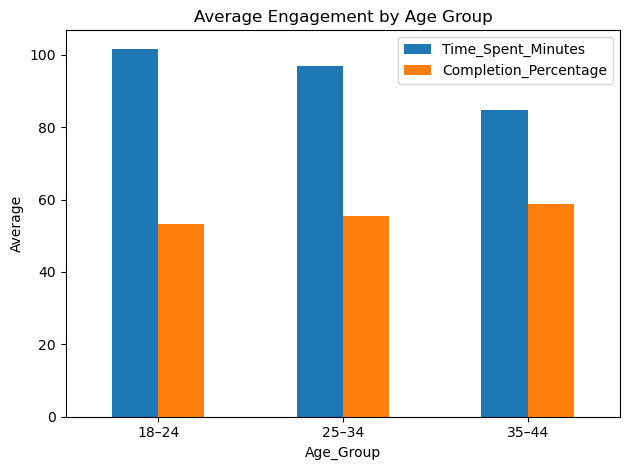

,Time_Spent_Minutes,Completion_Percentage
Age_Group,,
18–24,102.0,53.0
25–34,97.0,55.0
35–44,85.0,59.0


In [384]:
# Engagement Trends by Age

engagement_by_age = final_df.groupby('Age_Group', observed=True)[['Time_Spent_Minutes', 'Completion_Percentage']].mean()

# Plot
engagement_by_age.plot(kind='bar')
plt.title('Average Engagement by Age Group')
plt.ylabel('Average')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

round(engagement_by_age)

D. *What is the average feedback rating per course?*


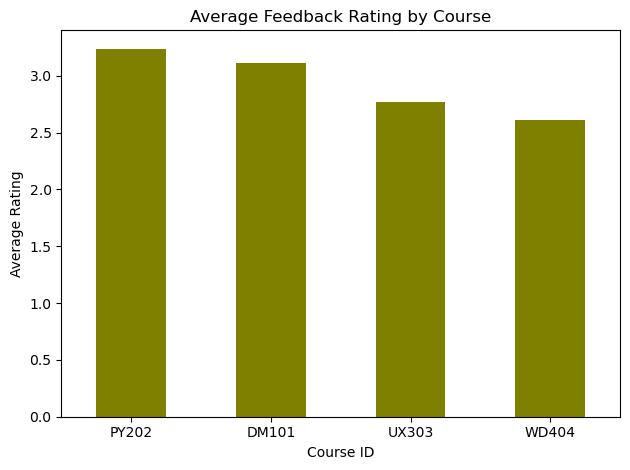

Course_ID
PY202    3.2
DM101    3.1
UX303    2.8
WD404    2.6
Name: Rating, dtype: float64

In [386]:
rating_by_course = final_df.groupby('Course_ID')['Rating'].mean().dropna().sort_values(ascending=False)

# Plot
rating_by_course.plot(kind='bar', color='olive')
plt.title('Average Feedback Rating by Course')
plt.ylabel('Average Rating')
plt.xlabel('Course ID')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

round(rating_by_course,1)

*E. Is there a correlation between completion rate and feedback rating?*

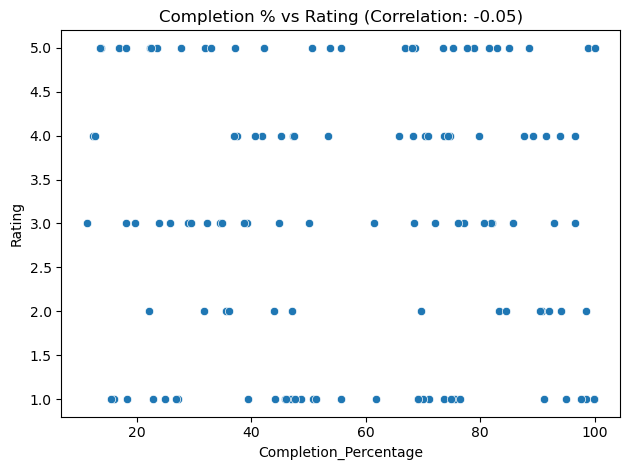

In [388]:
from scipy.stats import pearsonr
correlation_df = final_df[['Completion_Percentage', 'Rating']].dropna()
correlation, _= pearsonr(correlation_df['Completion_Percentage'], correlation_df['Rating'])

# Scatter Plot
sns.scatterplot(data=correlation_df, x='Completion_Percentage', y='Rating')
plt.title(f'Completion % vs Rating (Correlation: {correlation:.2f})')
plt.tight_layout()
plt.show()

*F. Identify top 3 student segments based on engagement and satisfaction.*

In [390]:
from sklearn.preprocessing import StandardScaler
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans

df = pd.read_csv("Students_Cleaned_Data.csv")

# Select relevant features and drop missing values
cluster_data = df[['Student_ID', 'Time_Spent_Minutes', 'Completion_Percentage', 'Rating']].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data[['Time_Spent_Minutes', 'Completion_Percentage', 'Rating']])

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Profile each segment
summary = cluster_data.groupby('Cluster').agg({
    'Time_Spent_Minutes': 'mean',
    'Completion_Percentage': 'mean',
    'Rating': 'mean',
    'Student_ID': 'count'}).rename(columns={'Student_ID': 'Student_Count'}).sort_values(by=['Completion_Percentage', 'Rating'], ascending=False)

print("Top 3 Student Segments Based on Engagement & Satisfaction:")
print(summary)

Top 3 Student Segments Based on Engagement & Satisfaction:
         Time_Spent_Minutes  Completion_Percentage    Rating  Student_Count
Cluster                                                                    
2                122.520833              70.905833  3.729167             48
1                 47.421053              58.741053  3.157895             38
0                128.750000              37.921944  1.888889             36


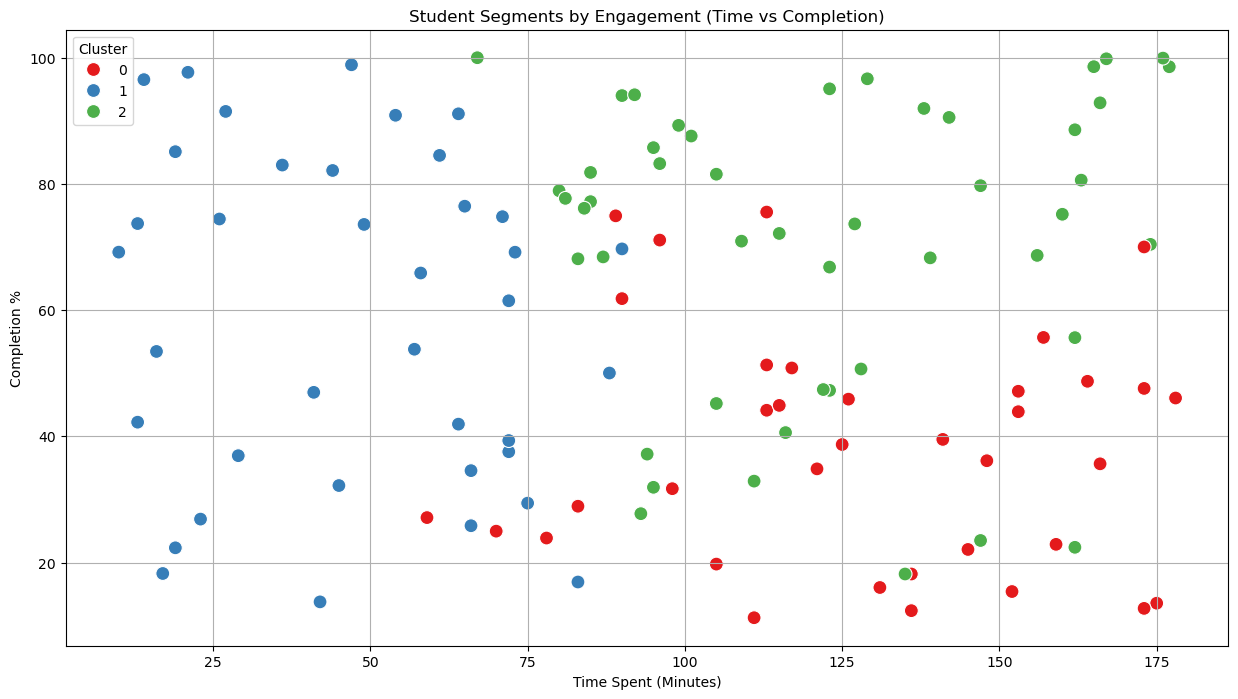

In [391]:
# Visualize the clusters

plt.figure(figsize=(15, 8))
sns.scatterplot(data=cluster_data, x='Time_Spent_Minutes', y='Completion_Percentage', hue='Cluster', palette='Set1', s=100)
plt.title('Student Segments by Engagement (Time vs Completion)')
plt.xlabel('Time Spent (Minutes)')
plt.ylabel('Completion %')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

***--------------------------------------------------------------------------------------------------------------------------------------------------***

### Feedback Rating by Demographics:


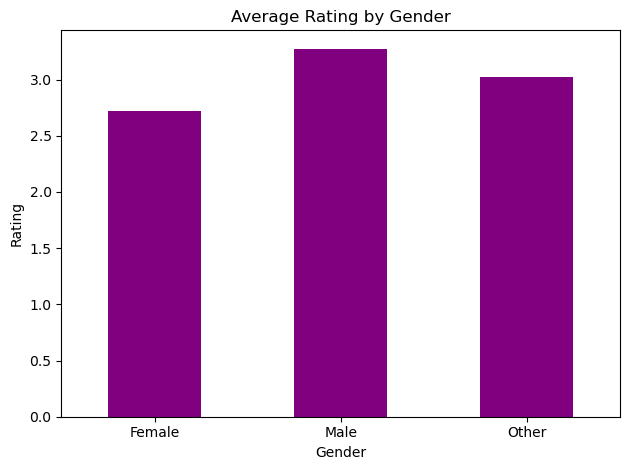

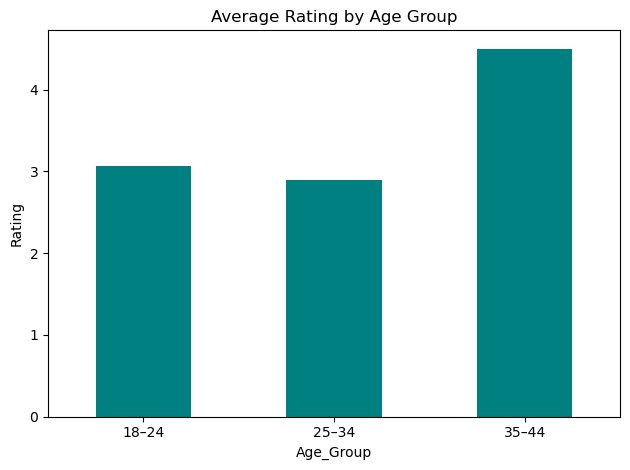

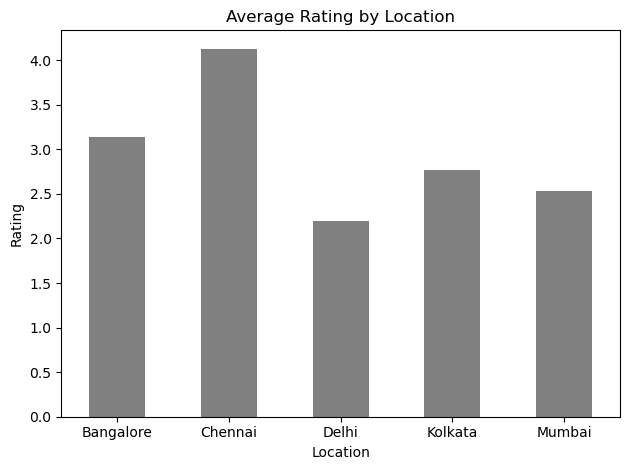

In [397]:
# By Gender
feedback_by_gender = final_df.groupby('Gender')['Rating'].mean().dropna()
feedback_by_gender.plot(kind='bar', color='purple')
plt.title('Average Rating by Gender')
plt.xticks(rotation=0)
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# By Age Group
feedback_by_age = final_df.groupby('Age_Group', observed=False)['Rating'].mean().dropna()
feedback_by_age.plot(kind='bar', color='teal')
plt.title('Average Rating by Age Group')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# By Location
feedback_by_location = final_df.groupby('Location')['Rating'].mean().dropna()
feedback_by_location.plot(kind='bar', color='gray')
plt.title('Average Rating by Location')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


***Insightful Patterns in Learner Ratings by Demographics***

In [399]:
print("\n1. Average Feedback Ratings by Gender:")
for gender, rating in round(feedback_by_gender, 1).items():
    print(f"• {gender}: {rating} ⭐")

top_gender = feedback_by_gender.idxmax()
print(f"\n Insight: Students identifying as '{top_gender}' gave the highest average ratings.")


print("\n2. Average Feedback Ratings by Age Group:")
for age_group, rating in round(feedback_by_age, 1).items():
    print(f"• Age {age_group}: {rating} ⭐")

top_age = feedback_by_age.idxmax()
print(f"\n Insight: Learners aged '{top_age}' are the most satisfied with the platform.")

print("\n3. Average Feedback Ratings by Location:")
for loc, rating in round(feedback_by_location, 1).items():
    print(f"• {loc}: {rating} ⭐")

top_loc = feedback_by_location.idxmax()
low_loc = feedback_by_location.idxmin()
print(f"\n Insight: '{top_loc}' has the most satisfied learners, while '{low_loc}' shows room for improvement.")



1. Average Feedback Ratings by Gender:
• Female: 2.7 ⭐
• Male: 3.3 ⭐
• Other: 3.0 ⭐

 Insight: Students identifying as 'Male' gave the highest average ratings.

2. Average Feedback Ratings by Age Group:
• Age 18–24: 3.1 ⭐
• Age 25–34: 2.9 ⭐
• Age 35–44: 4.5 ⭐

 Insight: Learners aged '35–44' are the most satisfied with the platform.

3. Average Feedback Ratings by Location:
• Bangalore: 3.1 ⭐
• Chennai: 4.1 ⭐
• Delhi: 2.2 ⭐
• Kolkata: 2.8 ⭐
• Mumbai: 2.5 ⭐

 Insight: 'Chennai' has the most satisfied learners, while 'Delhi' shows room for improvement.


***---------------------------------------------------------------------------------------------------------------------------------------------------***

## 🧾 Final Analysis Summary


### 🔍 Key Insights
1. Highest course completion: UX303
2. Most time spent: DM101
3. Highest ratings: PY202
4. Best age group: 35–44
5. Top location: Chennai

### ✅ Recommendations
- Improve DM101 UX
- Promote top-performing courses
- Expand offerings for age 35–44